# Exercise 4.1

In [156]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline

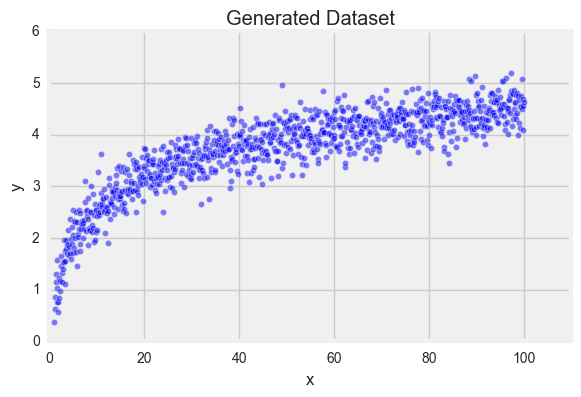

In [174]:
N = 1000
x = np.linspace(1,100,N)
eps = np.random.normal(0, 0.3, N)
beta0 = np.random.uniform(0, 1, 1)
beta1 = np.random.uniform(0.8, 1, 1)
y = beta1*np.log(x) + eps + beta0
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.xlim([0,110]); plt.ylim([0,6])
plt.title('Generated Dataset');

In [175]:
#Quadratic Model
x_train, x_test, y_train, y_test = train_test_split(np.square(x), y, test_size=0.3)
model = LinearRegression()
fit = model.fit(x_train,y_train)
y_pred1 = fit.predict(x_test)
score1 = metrics.r2_score(y_test, y_pred1);
print('Out-of-sample test score for the Quadratic Model:' , score1)

Out-of-sample test score for the Quadratic Model: 0.549038680759


In [176]:
#Log Model
x_train, x_test, y_train, y_test = train_test_split(np.log(x), y, test_size=0.3)
model = LinearRegression()
fit = model.fit(x_train,y_train)
y_pred2 = fit.predict(x_test)
score2 = metrics.r2_score(y_test, y_pred2);
print('Out-of-sample test score for the Log Model:' , score2)

Out-of-sample test score for the Log Model: 0.881693429185


# Exercise 4.2

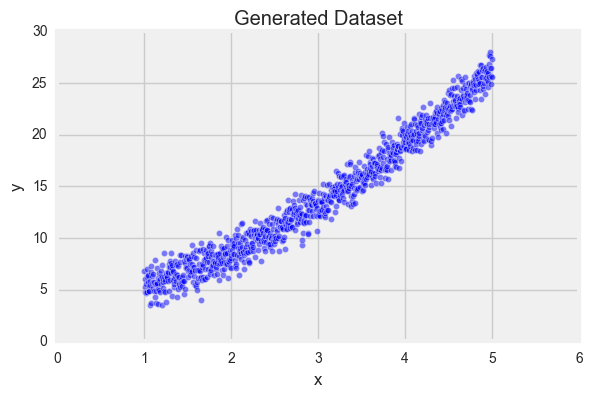

In [282]:
N = 1000
x = np.linspace(1,5,N)
eps = np.random.normal(0, 1, N)
beta0 = np.random.uniform(1, 5, 1)
beta1 = np.random.uniform(0.5, 1, 1)
beta2 = np.random.uniform(0.5, 1, 1)
y = beta2*np.square(x) + beta1*x + beta0 + eps
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.title('Generated Dataset');

In [283]:
#Quadratic Model
x_train, x_test, y_train, y_test = train_test_split(np.square(x), y, test_size=0.3)
model = LinearRegression()
fit = model.fit(x_train,y_train)
y_pred1 = fit.predict(x_test)
score1 = metrics.mean_squared_error(y_test, y_pred1);
print('Out-of-sample mean-squared-error for the Quadratic Model:' , score1)

Out-of-sample mean-squared-error for the Quadratic Model: 1.13906504127


# Exercise 4.3

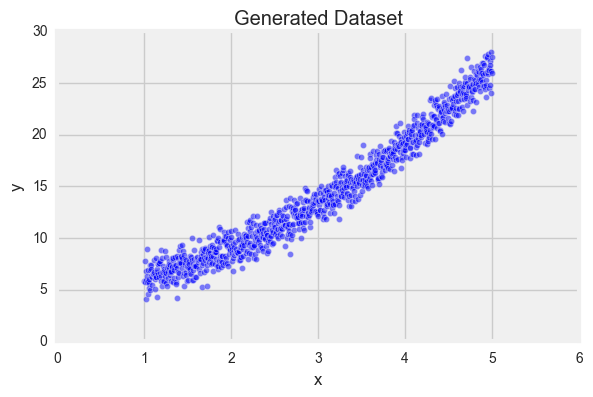

In [293]:
N = 1000
x = np.linspace(1,5,N)
eps = np.random.normal(0, 1, N)
beta0 = np.random.uniform(1, 5, 1)
beta1 = np.random.uniform(0.5, 1, 1)
beta2 = np.random.uniform(0.5, 1, 1)
y = beta2*np.square(x) + beta1*x + beta0 + eps
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.title('Generated Dataset');

In [294]:
training_error = []
testing_error = []
test_r2 = []
AIC = []
for degree in range(1,8):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = sm.OLS(y_train, x_train)
    fit = model.fit()
    training_error.append(metrics.mean_squared_error(y_train, fit.predict(x_train)))
    testing_error.append(metrics.mean_squared_error(y_test, fit.predict(x_test)))
    test_r2.append(metrics.r2_score(y_test, fit.predict(x_test)))
    AIC.append(fit.aic)

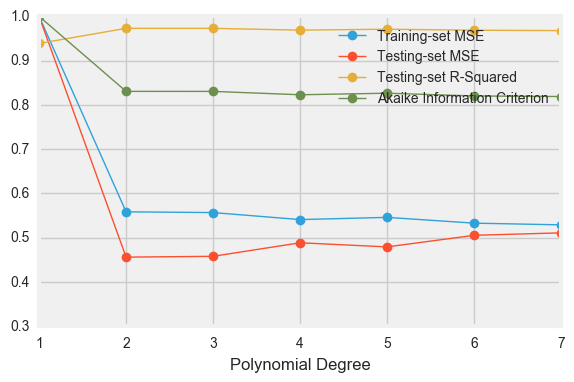

In [296]:
plt.plot(range(1,8),training_error/training_error[0],'-o',linewidth = 1)
plt.plot(range(1,8),testing_error/testing_error[0],'-o',linewidth = 1)
plt.plot(range(1,8),test_r2,'-o',linewidth = 1)
plt.plot(range(1,8),AIC/AIC[0],'-o',linewidth = 1)
plt.xlabel('Polynomial Degree')
plt.legend(['Training-set MSE','Testing-set MSE','Testing-set R-Squared','Akaike Information Criterion'])
plt.ylim([0.3,1]);

# Exercise 4.4

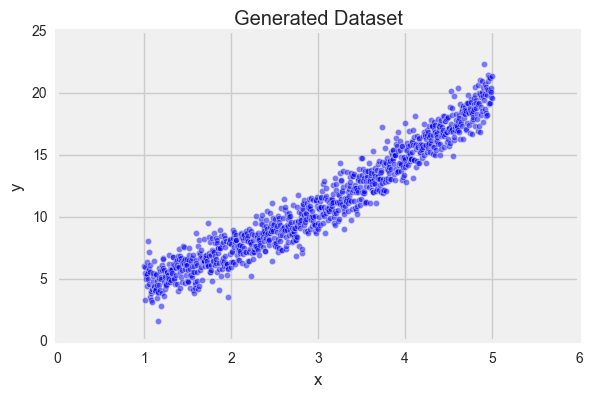

In [297]:
N = 1000
x = np.linspace(1,5,N)
eps = np.random.normal(0, 1, N)
beta0 = np.random.uniform(1, 5, 1)
beta1 = np.random.uniform(0.5, 1, 1)
beta2 = np.random.uniform(0.5, 1, 1)
y = beta2*np.square(x) + beta1*x + beta0 + eps
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.title('Generated Dataset');

In [298]:
training_error = []
testing_error = []
m_list = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
for m in range(5,len(y_train),5):
    poly = PolynomialFeatures(2)
    ym_train = y_train[0:m]
    xm_train = x_train[0:m]
    Xm_train = poly.fit_transform(xm_train)
    X_test = poly.fit_transform(x_test)
    model = sm.OLS(ym_train, Xm_train)
    fit = model.fit()
    training_error.append(metrics.mean_squared_error(ym_train, fit.predict(Xm_train)))
    testing_error.append(metrics.mean_squared_error(y_test, fit.predict(X_test)))
    m_list.append(m)

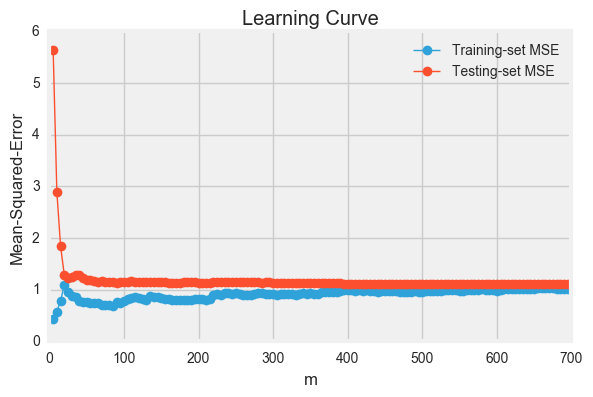

In [300]:
plt.plot(m_list,training_error,'-o',linewidth = 1)
plt.plot(m_list,testing_error,'-o',linewidth = 1)
plt.xlabel('m')
plt.legend(['Training-set MSE','Testing-set MSE'])
plt.title('Learning Curve')
plt.ylabel('Mean-Squared-Error');